In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
df = pd.read_csv('salary_data_clean.csv')

In [279]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Province,Age,Python,RStudio,Spark,AWS,Excel,JobSimplified,Seniority,DescLength
0,Senior Data Scientist,CA$58k-CA$90k (Glassdoor Est.),Myplanet is looking for a Senior Data Scientis...,4.6,Myplanet\n4.6,Toronto,-1,51 to 200 Employees,2009,Company - Private,...,ON,11,1,1,0,0,0,data scientist,senior,4502
1,Marketing Data Scientist,CA$58k-CA$90k (Glassdoor Est.),Top Hat is looking for a technical Marketing D...,3.5,Top Hat\n3.5,Toronto,-1,201 to 500 Employees,2009,Company - Private,...,ON,11,1,1,0,0,0,data scientist,na,3982
2,"Data Analyst, NAV Recon",CA$58k-CA$90k (Glassdoor Est.),"Data Analyst, NAV Recon\nConnor, Clark & Lunn ...",4.3,"Connor, Clark & Lunn Financial Group\n4.3",Vancouver,-1,201 to 500 Employees,1982,Company - Private,...,BC,38,0,1,0,0,0,analyst,na,6532
3,Data Mining Specialist,CA$58k-CA$90k (Glassdoor Est.),"What we do\nInterested in solving problems, en...",5.0,Global Spatial Technology Solutions\n5.0,Dartmouth,-1,1 to 50 Employees,-1,Unknown,...,NS,-1,1,1,0,0,0,na,na,3632
4,"Intern, Data Engineer – Digital Strategy and I...",CA$58k-CA$90k (Glassdoor Est.),EXPERIENCE THE EDGE\n\n\nWe’re one of Canada’s...,4.4,PSP Investments\n4.4,Montreal,-1,501 to 1000 Employees,1999,Other Organization,...,QC,21,1,1,1,0,1,data engineer,na,3112


In [280]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'EmployerProvided', 'MinSalary', 'MaxSalary', 'AvgSalary',
       'CompanyText', 'Province', 'Age', 'Python', 'RStudio', 'Spark', 'AWS',
       'Excel', 'JobSimplified', 'Seniority', 'DescLength'],
      dtype='object')

In [281]:
df.describe()

,Rating,Headquarters,Founded,Competitors,Hourly,EmployerProvided,MinSalary,MaxSalary,AvgSalary,Age,Python,RStudio,Spark,AWS,Excel,DescLength
count,80.000000,80.0,80.000000,80.0,80.0,80.0,50.000000,80.000000,50.000000,80.000000,80.000000,80.0,80.000000,80.000000,80.000000,80.000000
mean,3.456250,-1.0,1462.212500,-1.0,0.0,0.0,66.800000,61.250000,81.800000,27.012500,0.825000,1.0,0.375000,0.225000,0.450000,3844.325000
std,1.490802,0.0,879.178438,0.0,0.0,0.0,10.887177,46.657247,9.649997,39.291347,0.382364,0.0,0.487177,0.420217,0.500633,1851.094618
min,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,58.000000,2.000000,74.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,703.000000
25%,3.400000,-1.0,-1.000000,-1.0,0.0,0.0,58.000000,2.000000,74.000000,-1.000000,1.000000,1.0,0.000000,0.000000,0.000000,2736.750000
50%,3.700000,-1.0,1985.000000,-1.0,0.0,0.0,58.000000,90.000000,74.000000,15.000000,1.000000,1.0,0.000000,0.000000,0.000000,3330.500000
75%,4.125000,-1.0,2004.000000,-1.0,0.0,0.0,80.000000,94.250000,93.500000,31.750000,1.000000,1.0,1.000000,0.000000,1.000000,4679.250000
max,5.000000,-1.0,2020.000000,-1.0,0.0,0.0,80.000000,107.000000,93.500000,163.000000,1.000000,1.0,1.000000,1.000000,1.000000,10104.000000


### Graphing Intial Values

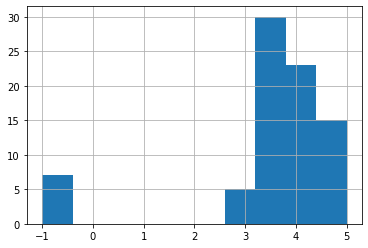

In [282]:
df.Rating.hist()

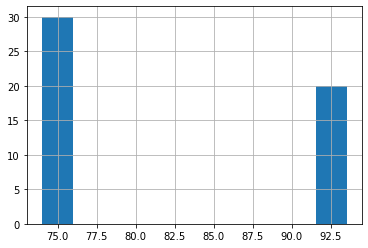

In [283]:
df.AvgSalary.hist()

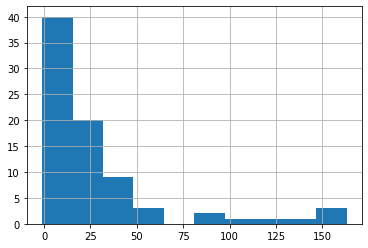

In [284]:
df.Age.hist()

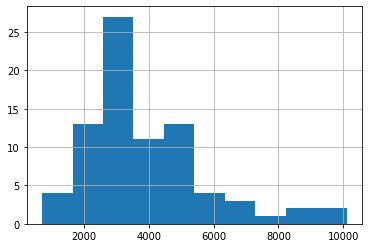

In [285]:
df.DescLength.hist()

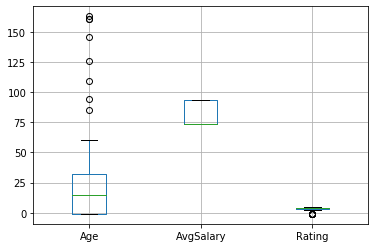

In [286]:
df.boxplot(column=['Age', 'AvgSalary', 'Rating'])

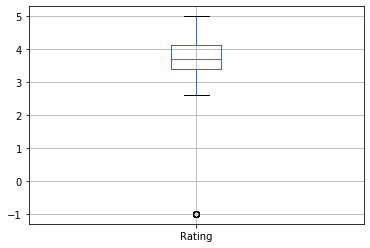

In [287]:
df.boxplot('Rating')

Boxplot shows high outliers in Age, and a few low outliers for Rating

### Correlations between continuous variables:

In [288]:
corr_cont = df[['Age', 'AvgSalary', 'Rating','DescLength']].corr()
corr_cont

,Age,AvgSalary,Rating,DescLength
Age,1.000000,-0.122501,0.141426,0.150383
AvgSalary,-0.122501,1.000000,-0.354600,-0.175607
Rating,0.141426,-0.354600,1.000000,0.006436
DescLength,0.150383,-0.175607,0.006436,1.000000


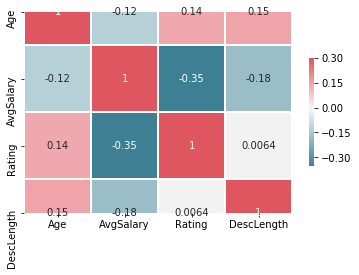

In [289]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_cont, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Correlations between categorical variables:

In [290]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'CompanyText', 'Province','Python', 'RStudio', 'Spark', 'AWS',
       'Excel', 'JobSimplified', 'Seniority']]

Graph for Location: total = 19


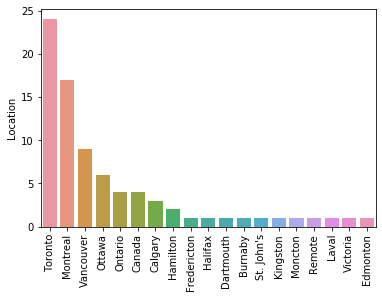

Graph for Headquarters: total = 1


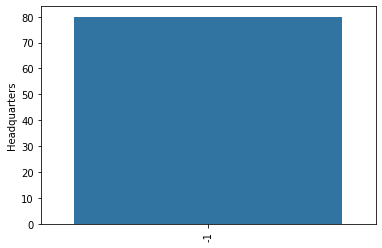

Graph for Size: total = 9


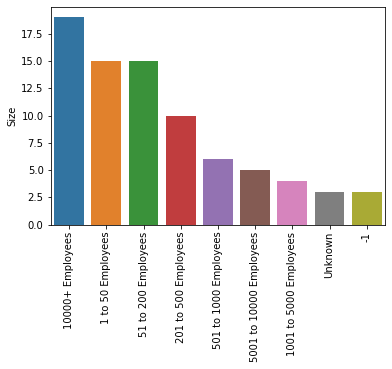

Graph for Type of ownership: total = 11


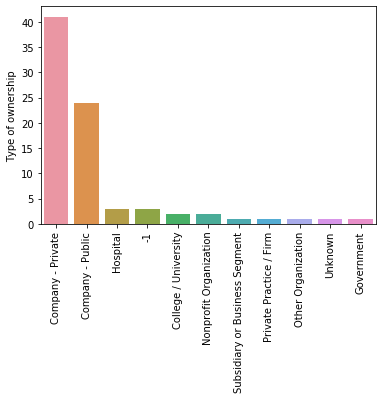

Graph for Industry: total = 27


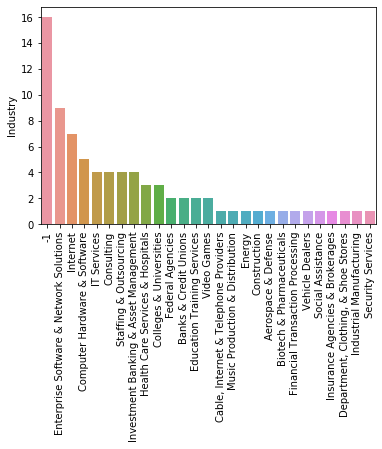

Graph for Sector: total = 17


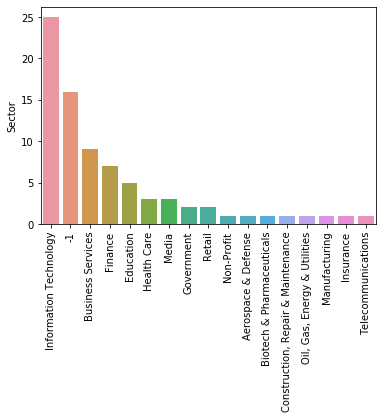

Graph for Revenue: total = 11


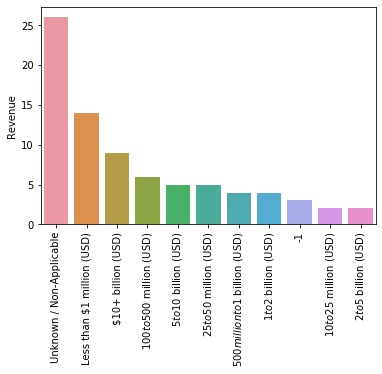

Graph for CompanyText: total = 75


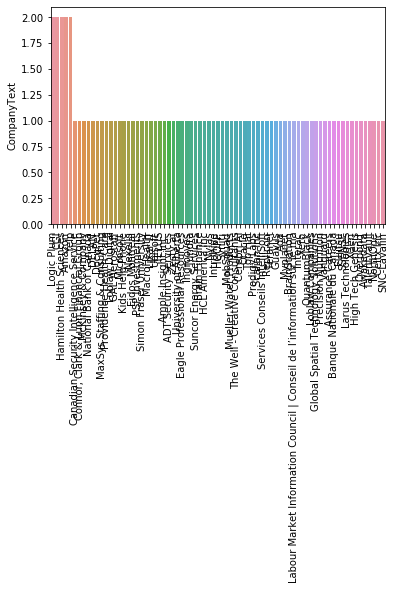

Graph for Province: total = 8


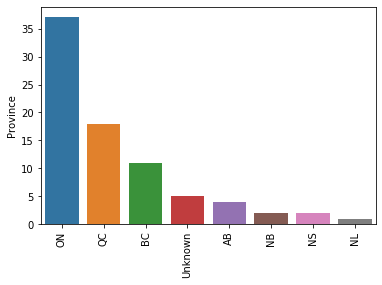

Graph for Python: total = 2


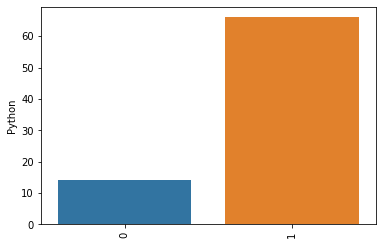

Graph for RStudio: total = 1


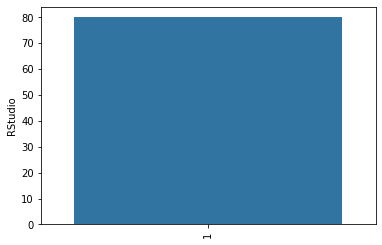

Graph for Spark: total = 2


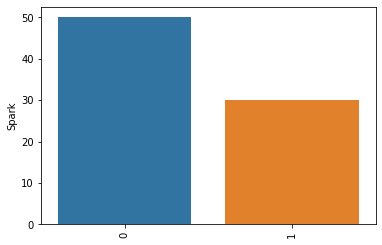

Graph for AWS: total = 2


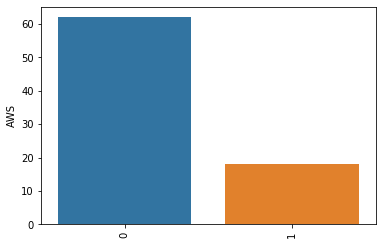

Graph for Excel: total = 2


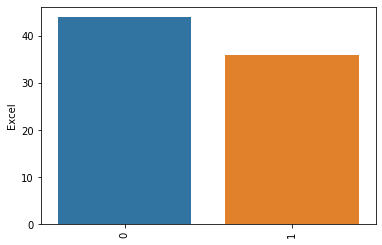

Graph for JobSimplified: total = 4


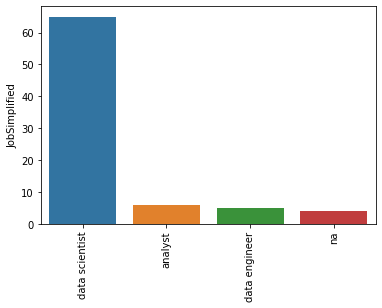

Graph for Seniority: total = 3


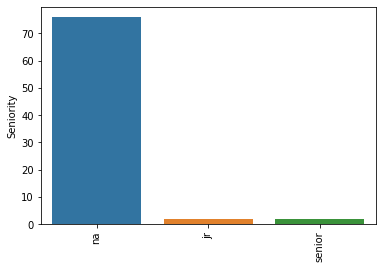

In [291]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d'%(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Top 10 values for the above graphs that were more clustered:

Graph for Industry: total = 10


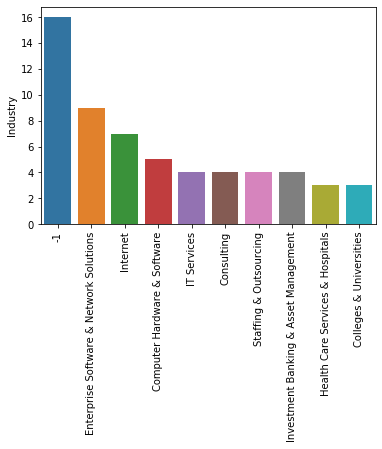

Graph for Location: total = 10


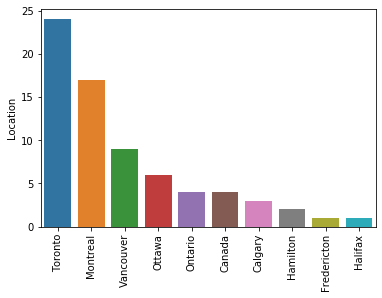

Graph for CompanyText: total = 10


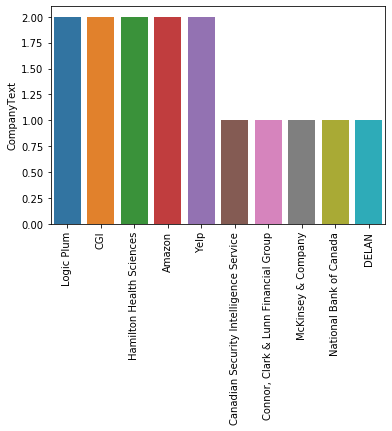

In [292]:
for i in df_cat[['Industry','Location', 'CompanyText']].columns:
    cat_num = df_cat[i].value_counts()[:10]
    print('Graph for %s: total = %d'%(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

### Analyzing Salary

Using pivot tables to analyze salaries based on factors:
- Province
- Rating
- Industry
- Revenue
- Python
- R Studio
- AWS
- Excel
- Description Length
- Type of Ownership

In [293]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'EmployerProvided', 'MinSalary', 'MaxSalary', 'AvgSalary',
       'CompanyText', 'Province', 'Age', 'Python', 'RStudio', 'Spark', 'AWS',
       'Excel', 'JobSimplified', 'Seniority', 'DescLength'],
      dtype='object')

In [294]:
pd.pivot_table(df, index='JobSimplified', values='AvgSalary')

,AvgSalary
JobSimplified,
analyst,83.750
data engineer,78.875
data scientist,82.000
na,74.000


In [295]:
pd.pivot_table(df, index=['JobSimplified', 'Seniority'], values='AvgSalary')

AvgSalary
JobSimplified  Seniority           
analyst        na         83.750000
data engineer  na         78.875000
data scientist jr         74.000000
               na         82.914286
               senior     74.000000
na             na         74.000000

In [296]:
pd.pivot_table(df, index=['Province'], values='AvgSalary').sort_values('AvgSalary', ascending=False)

,AvgSalary
Province,
NL,93.500000
ON,84.214286
BC,81.312500
AB,80.500000
QC,80.500000
NB,74.000000
NS,74.000000
Unknown,74.000000


In [297]:
pd.pivot_table(df, index=['Province','JobSimplified'], values='AvgSalary').sort_values('AvgSalary', ascending=False)

,,AvgSalary
Province,JobSimplified,
NL,data scientist,93.500000
ON,analyst,93.500000
BC,analyst,83.750000
QC,data engineer,83.750000
ON,data scientist,83.236842
AB,data scientist,80.500000
BC,data scientist,80.500000
QC,data scientist,80.500000
NB,analyst,74.000000


Surprisingly the results show Newfoundland (NL) as the province with the highest Data Science salaries. Doing further research, in 2019 Newfoundland jump-started their work in health analytics by investing $3.8 million in a Health Data Lab focused on analytics and artificial intelligence to improve healthcare delivery. This initiative may become the most advanced of its sort in Canada. More information can be found at https://www.canhealth.com/2019/03/01/newfoundland-jump-starts-its-work-in-health-analytics/

Comparing below only Data Scientist and only Analyst role salaries

In [298]:
pd.pivot_table(df[df.JobSimplified=='data scientist'], index=['Province','JobSimplified'], values='AvgSalary').sort_values('AvgSalary', ascending=False)

,,AvgSalary
Province,JobSimplified,
NL,data scientist,93.500000
ON,data scientist,83.236842
AB,data scientist,80.500000
BC,data scientist,80.500000
QC,data scientist,80.500000
NS,data scientist,74.000000


In [299]:
pd.pivot_table(df[df.JobSimplified=='analyst'], index=['Province','JobSimplified'], values='AvgSalary').sort_values('AvgSalary', ascending=False)

,,AvgSalary
Province,JobSimplified,
ON,analyst,93.50
BC,analyst,83.75
NB,analyst,74.00
QC,analyst,74.00


In [300]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'EmployerProvided', 'MinSalary', 'MaxSalary', 'AvgSalary',
       'CompanyText', 'Province', 'Age', 'Python', 'RStudio', 'Spark', 'AWS',
       'Excel', 'JobSimplified', 'Seniority', 'DescLength'],
      dtype='object')

In [301]:
df_pivots = df[['Rating', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 
       'Python', 'RStudio', 'Spark', 'AWS', 'Excel', 'AvgSalary', 'JobSimplified']]

In [302]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='AvgSalary').sort_values('AvgSalary', ascending=False))

Rating
        AvgSalary
Rating           
 4.5       93.500
 2.9       93.500
-1.0       89.600
 4.1       83.750
 3.3       83.750
 3.4       83.750
 3.5       83.750
 3.6       83.750
 3.7       83.750
 4.3       83.750
 4.0       81.800
 3.9       78.875
 3.8       74.000
 4.4       74.000
 3.1       74.000
 4.6       74.000
 4.7       74.000
 4.8       74.000
 5.0       74.000
Type of ownership
                         AvgSalary
Type of ownership                 
-1                           87.00
College / University         83.75
Company - Public             83.75
Company - Private            81.50
Hospital                     80.50
Nonprofit Organization       74.00
Other Organization           74.00
Private Practice / Firm      74.00
Unknown                      74.00
Industry
                                         AvgSalary
Industry                                          
Vehicle Dealers                              93.50
Computer Hardware & Software                 93.50

ValueError: Grouper for 'AvgSalary' not 1-dimensional

In [305]:
pd.pivot_table(df_pivots, index='Revenue', columns='Python', values='AvgSalary', aggfunc='count')

Python,0,1
Revenue,,
$1 to $2 billion (USD),1.0,2.0
$10 to $25 million (USD),1.0,1.0
$10+ billion (USD),1.0,2.0
$100 to $500 million (USD),1.0,2.0
$2 to $5 billion (USD),NaN,1.0
$25 to $50 million (USD),1.0,3.0
$5 to $10 billion (USD),2.0,2.0
$500 million to $1 billion (USD),NaN,4.0
-1,NaN,3.0


In [306]:
pd.pivot_table(df_pivots, index='Revenue', columns='Python', values='AvgSalary')

Python,0,1
Revenue,,
$1 to $2 billion (USD),74.00,93.500000
$10 to $25 million (USD),74.00,74.000000
$10+ billion (USD),93.50,83.750000
$100 to $500 million (USD),74.00,83.750000
$2 to $5 billion (USD),NaN,74.000000
$25 to $50 million (USD),74.00,80.500000
$5 to $10 billion (USD),83.75,83.750000
$500 million to $1 billion (USD),NaN,83.750000
-1,NaN,87.000000


In [307]:
pd.pivot_table(df_pivots, index='JobSimplified', columns='Python', values='AvgSalary', aggfunc='count')

Python,0,1
JobSimplified,,
analyst,3,3
data engineer,2,2
data scientist,5,34
na,0,1


In [308]:
pd.pivot_table(df_pivots, index='JobSimplified', columns='Python', values='AvgSalary')

Python,0,1
JobSimplified,,
analyst,74.0,93.500000
data engineer,74.0,83.750000
data scientist,81.8,82.029412
na,NaN,74.000000


### Word Cloud Visualization

In [312]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Visitor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


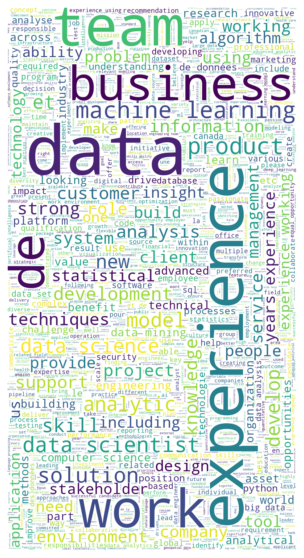

In [313]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()